In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seq_str = 'ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAATATTTCTCACCCTCTTCATCCTATTTCAACTAAAAATTTCAAATCACTACTACCCAGAAAACCCGATAACCAAATCTGCTAAAATTGCTGGTCAACATAATCCTTGAGAAAACAAATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAAAACCAAATCTGCTAAAATTGCTGGTCAACATAATCCTTGAGAAAACAAATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAAATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAGGTCTCCCTATTGTGGTACTGATCGTCATATTCCCTTCCATTTTATTCCCAACACCCAGTCGCCTAATCAATAATCGGTTAATCTCCATTCAGCAATGACTAATTCAACTAACATCAAAACAAATACTAGCAATTCATAACCAAAAGGGACGAACCTGAGCTCTCATACTTATATCACTAATTCTATTTATTGGCTCAACTAATCTACTTGGACTATTACCTCACTCATTTACGCCCACAACACAACTCTCTATAAACCTCGGAATAGCAATTCCCCTATGAGCAGGGACAGTAATTACCGGTTTCCGCTATAAAACCAAAGCATCCTTAGCACACTTTCTACCCCAAGGCACCCCTCTCCCCCTAATTCCAATACTAGTAGTCATCGAAACTATTAGTCTATTTATTCAACCCATGGCTCTAGCCGTTCGATTAACCGCCAATATTACTGCAGGACACCTCCTAATCCATTTGATTGGAGGGGCTACCTTAGCTCTTATCAATATTAGCGCGACCACAGCTTTTATCACTTTTATTATTCTAATCCTACTTACGATCCTAGAATTTGCTGTTGCCTTAATT'

In [3]:
len(seq_str)

922

In [4]:
print(set(seq_str))
print(len(set(seq_str)))

{'A', 'T', 'C', 'G'}
4


In [5]:
seq_dict = {
    'A' : 0,
    'C' : 1,
    'G' : 2,
    'T' : 3
}

In [6]:
seq_int_arr = []

for c in seq_str:
    seq_int_arr.append(seq_dict[c])
    
print(list(seq_str[-10:]))
print(seq_int_arr[-10:])

['T', 'G', 'C', 'C', 'T', 'T', 'A', 'A', 'T', 'T']
[3, 2, 1, 1, 3, 3, 0, 0, 3, 3]


In [9]:
from HOMarkov import markov

In [10]:
n = len(set(seq_int_arr))
k=2

In [11]:
mc = markov.MarkovChain(n, k)

In [12]:
mc.fit(seq_int_arr)

In [13]:
mc.transition_matrix.todense()

matrix([[0.13207547, 0.0754717 , 0.01886792, 0.12264151, 0.0754717 ,
         0.08490566, 0.02830189, 0.04716981, 0.        , 0.00943396,
         0.01886792, 0.        , 0.10377358, 0.14150943, 0.03773585,
         0.10377358],
        [0.08064516, 0.06451613, 0.0483871 , 0.06451613, 0.08064516,
         0.11290323, 0.03225806, 0.09677419, 0.08064516, 0.01612903,
         0.        , 0.        , 0.17741935, 0.03225806, 0.03225806,
         0.08064516],
        [0.14285714, 0.        , 0.        , 0.03571429, 0.21428571,
         0.03571429, 0.03571429, 0.14285714, 0.03571429, 0.03571429,
         0.10714286, 0.03571429, 0.07142857, 0.10714286, 0.        ,
         0.        ],
        [0.12222222, 0.04444444, 0.02222222, 0.05555556, 0.06666667,
         0.08888889, 0.03333333, 0.08888889, 0.05555556, 0.01111111,
         0.01111111, 0.        , 0.08888889, 0.14444444, 0.05555556,
         0.11111111],
        [0.13235294, 0.13235294, 0.01470588, 0.16176471, 0.07352941,
         0.0735

In [14]:
from itertools import product
labels = [''.join(p) for p in product(seq_dict.keys(), repeat=k)]

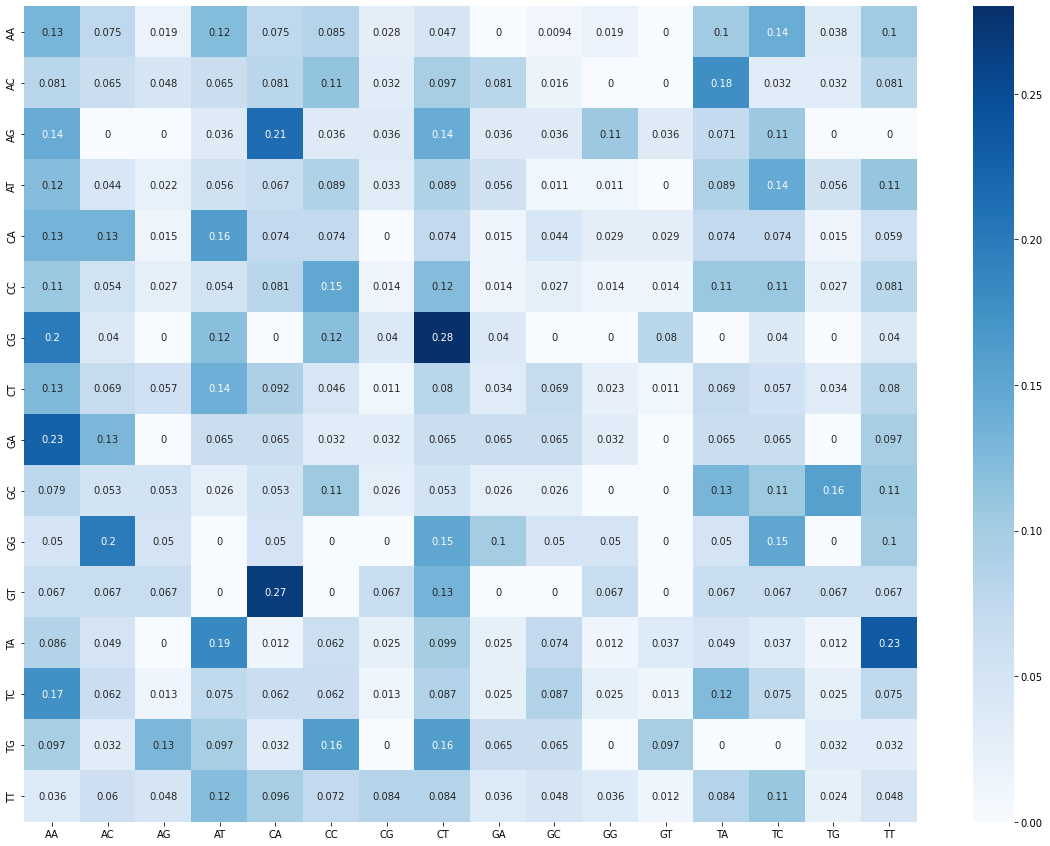

In [15]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(mc.transition_matrix.todense(), cmap='Blues', annot=True, xticklabels=labels, yticklabels=labels, ax=ax)